In [59]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from math import pi

import astropy.io.ascii as a
import astropy.io.fits
import astropy.table

#created a file with formulas for this
import FormulasForGaia as F

In [82]:
def extractStars(filename):
    
    """
    This function will read in a TGAS FITS file and extract the information that the 
    Sky Of Stars project will be working with.
    It will only use the data from stars whose parallax error is less than 20%.
        
    Parameters:
    ------------------------------------------------------------------
    Filename = TGAS.fits file
        
    Returns: 
    ------------------------------------------------------------------
    Arrays for X,Y and Z positions and arrays for right ascencion, declination, magnitudes,
    distances and absolute magnitudes. 
    label: A
  
    """
    #Read the file into a table:
    hdu = astropy.io.fits.open(filename)
    table = astropy.table.Table(hdu[1].data)

    #Create a statement to get rid of stars with parallax error larger than 20% or with negative distances:
    fraction = np.abs(table['parallax_error']/table['parallax'])
    ok1 = fraction < 0.2
    ok2 = table['parallax']>0
    ok = ok1*ok2
    ##ok3???
    
    
    #From the table, extract parallax and other useful info, take only those rows for which [ok] is true:
    Parallax= table['parallax'].data[ok] #.data takes only the numbers, getting rid of the tittle of the column
    Dec = (table['dec'].data[ok])*(pi/180) #changing RA and DEC to radians.
    RA = (table['ra'].data[ok])*(pi/180)
    Fluxes= table['phot_g_mean_flux'].data[ok]
    Magnitudes = table['phot_g_mean_mag'].data[ok]
    
    #Use formulas to produce more useful arrays:
    Distances = F.ParallaxToDistance(Parallax)
    X,Y,Z= F.toXYZ(RA,Dec,Distances)
    AbsoluteMagnitudes = F.AbsoluteMagnitude(Distances,Magnitudes)
    
    #Create a label dependant on the file name:
    temp = filename.replace('.fits','.png')
    tempList = temp.split('_')
    label = tempList[-1]
    
    return X,Y,Z,RA,Dec,Magnitudes,Distances,AbsoluteMagnitudes,Fluxes,label

def PlotStars(X,Y,Z,RA,Dec,Distances,Fluxes,label):
    """ 
    This function creates demonstraation plots and saves each in a file with name
    dependent on the Gaia file it comes from
    
    Parameters: 
    -------------------------------------------------------------------
    X,Y,Z,RA,DEC,Distances arrays calculated or extracted using the function "extractStars".
    label: string dependant on file name, also obtained with the "extractStars"function.
    
    Returns and Saves:
    --------------------------------------------------------------------
    4 plots: x vs y position, x vs z position, y vs z position and RA vs Dec.
    The title of each plot 
    
    """    
    plt.figure(figsize=(9,9))
    plt.scatter(X,Y,s = Fluxes/1000000,alpha=0.1)
    plt.xlim(np.min(X),np.max(X))
    plt.ylim(np.min(Y),np.max(Y))
    plt.xlabel('X Coordinates')
    plt.ylabel('y coordinates')  
    plt.title('X vs Y for {}'.format(label))
    plt.savefig('XY_{}'.format(label))
    
    plt.figure(figsize=(9,9))
    plt.scatter(X,Z,s = Fluxes/1000000,alpha=0.1)
    plt.xlim(np.min(X),np.max(X))
    plt.ylim(np.min(Z),np.max(Z))
    plt.xlabel('X Coordinates')
    plt.ylabel('Z coordinates')  
    plt.title('X vs Z for {}'.format(label)) #Make the graph title and filename depend on label.
    plt.savefig('XZ_{}'.format(label))
    
    plt.figure(figsize=(9,9))
    plt.scatter(Y,Z,s = Fluxes/1000000,alpha=0.1)
    plt.xlim(np.min(Y),np.max(Y))
    plt.ylim(np.min(Z),np.max(Z))
    plt.xlabel('Y Coordinates')
    plt.ylabel('Z coordinates')  
    plt.title('Y vs Z for {}'.format(label))
    plt.savefig('YZ_{}'.format(label))
    
    plt.figure(figsize=(9,9))
    plt.subplot(111, projection="aitoff")
    plt.scatter(RA,Dec,color='aqua')
    plt.xlabel('Right Ascension')
    plt.ylabel('Declination')
    plt.grid(True)
    plt.title('RA and Dec for {}'.format(label))
    plt.savefig('RADec_{}'.format(label))

def CreateTxtFile(X,Y,Z,AbsoluteMagnitudes,label): 
    """
    This functions create a text file that is label dependant, and contains a list of 
    X,Y,and Z positions, and absolute magnitude of each star
    
    Parameters:
    --------------------------------------------------------
    X,Y,Z,AbsoluteMagnitudes arrays.
    label:string dependant on file name, also obtained with the "extractStars"function.
    
    Saves:
    ---------------------------------------------------------
    "label".txt file with X,Y,Z and absolute magnitudes list for each star.
    """

#    with open("dataFrom{}.txt".format(label), "w") as FILE_WRITE: # to create a new file for writing
#        t = astropy.table.Table([X, Y, Z,AbsoluteMagnitudes], names=('X', 'Y', 'Z','Absolute Magnitudes'))
#        FILE_WRITE.write("{}".format(t))
        


    t = astropy.table.Table([X, Y,Z,AbsoluteMagnitudes], names=['X', 'Y','Z','Absolute Magnitudes'])
    a.write(t, '{}.txt'.format(label),format='fixed_width')
    
#    file = open("lastOne.txt”,”w”) 
 
#    file.write("{}".format(t)) 

 
#    file.close() 
    
    
def convertTgasFile(filename): 
    
    """
    This function uses the functions extractStars, CreateTcxtFile and PlotStars
    
    """
    X,Y,Z,RA,Dec,Magnitudes,Distances,AbsoluteMagnitudes,Fluxes, label = extractStars(filename) 
    CreateTxtFile(X,Y,Z,AbsoluteMagnitudes)
    PlotStars(X,Y,Z,RA,Dec,Distances,Fluxes,label)
     

#This has all been saved in an exernal module named FormulasToLoadGaia.
#Import this module on other notebooks to make use of all the above formulas 

In [36]:
from glob import glob
filenames = glob('data/TgasSource_000-000-*.fits')
print filenames

['data/TgasSource_000-000-000.fits', 'data/TgasSource_000-000-001.fits', 'data/TgasSource_000-000-002.fits', 'data/TgasSource_000-000-003.fits', 'data/TgasSource_000-000-004.fits', 'data/TgasSource_000-000-005.fits', 'data/TgasSource_000-000-006.fits', 'data/TgasSource_000-000-007.fits', 'data/TgasSource_000-000-008.fits', 'data/TgasSource_000-000-009.fits', 'data/TgasSource_000-000-010.fits', 'data/TgasSource_000-000-011.fits', 'data/TgasSource_000-000-012.fits', 'data/TgasSource_000-000-013.fits', 'data/TgasSource_000-000-015.fits']


In [ ]:
for i in range(len(filenames)):
    print filenames[i]
    convertTGASfile(filenames[i])
    

In [34]:
X,Y,Z,RA,Dec,Magnitudes,Distances,AbsoluteMagnitudes,Fluxes,label = extractStars('data/TgasSource_000-000-000.fits')
print X

[ 22944.07776457  37286.52534331  46154.02038669 ...,  40905.63326586
  24106.83457036  33194.65660825]


In [83]:
CreateTxtFile(X,Y,Z,AbsoluteMagnitudes,label)

In [85]:
plt.style.use('dark_background')

In [78]:
X1,Y1,Z1,RA1,Dec1,Magnitudes1,Distances1,AbsoluteMagnitudes1,Fluxes1,label1=extractStars('data/TgasSource_000-000-001.fits')
X2,Y2,Z2,RA2,Dec2,Magnitudes2,Distances2,AbsoluteMagnitudes2,Fluxes2,label2=extractStars('data/TgasSource_000-000-002.fits')
X3,Y3,Z3,RA3,Dec3,Magnitudes3,Distances3,AbsoluteMagnitudes3,Fluxes3,label3=extractStars('data/TgasSource_000-000-003.fits')
X4,Y4,Z4,RA4,Dec4,Magnitudes4,Distances4,AbsoluteMagnitudes4,Fluxes4,label4=extractStars('data/TgasSource_000-000-004.fits')
X5,Y5,Z5,RA5,Dec5,Magnitudes5,Distances5,AbsoluteMagnitudes5,Fluxes5,label5=extractStars('data/TgasSource_000-000-005.fits')
X6,Y6,Z6,RA6,Dec6,Magnitudes6,Distances6,AbsoluteMagnitudes6,Fluxes6,label6=extractStars('data/TgasSource_000-000-006.fits')
X7,Y7,Z7,RA7,Dec7,Magnitudes7,Distances7,AbsoluteMagnitudes7,Fluxes7,label7=extractStars('data/TgasSource_000-000-007.fits')
X8,Y8,Z8,RA8,Dec8,Magnitudes8,Distances8,AbsoluteMagnitudes8,Fluxes8,label8=extractStars('data/TgasSource_000-000-008.fits')

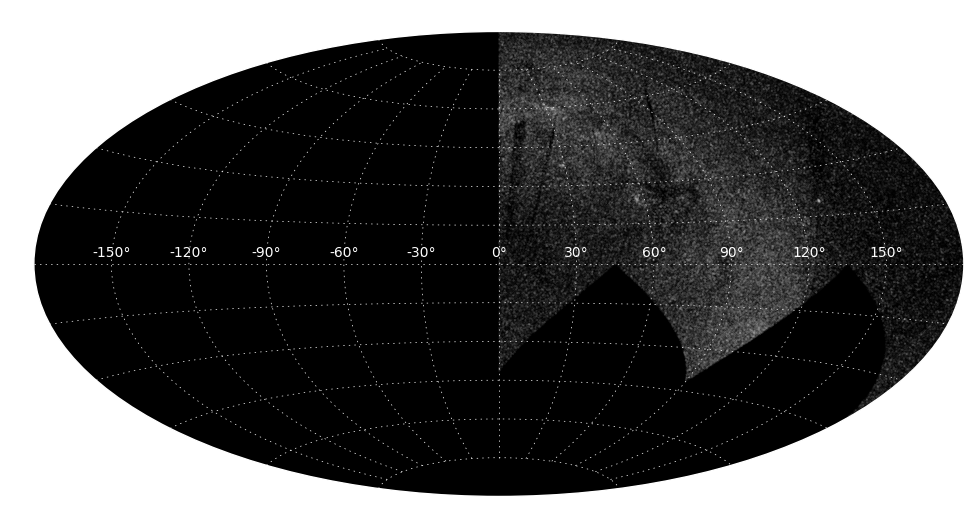

In [90]:
X5,Y5,Z5,RA5,Dec5,Magnitudes5,Distances5,AbsoluteMagnitudes5,Fluxes5,label5=extractStars('data/TgasSource_000-000-005.fits')

plt.figure(figsize=(12,12),facecolor=('white'))
plt.subplot(111, projection="aitoff")
kwargs = dict(color=('white'),alpha=0.1)
plt.scatter(RA,Dec, s = Fluxes/100000000,**kwargs)
plt.scatter(RA1,Dec1,s=Fluxes1/100000000,**kwargs)
plt.scatter(RA2,Dec2,s=Fluxes2/100000000,**kwargs)
plt.scatter(RA3,Dec3,s=Fluxes3/100000000,**kwargs)
plt.scatter(RA4,Dec4,s=Fluxes4/100000000,**kwargs)
plt.scatter(RA5,Dec5,s=Fluxes5/100000000,**kwargs)
plt.scatter(RA6,Dec6,s=Fluxes6/100000000,**kwargs)
plt.scatter(RA7,Dec7,s=Fluxes7/100000000,**kwargs)
plt.scatter(RA8,Dec8,s=Fluxes8/100000000,**kwargs)
plt.grid(True)

# fix RA
# make bigger module for functions
# eat healthy
# don't die